In [1]:
# -*- coding: utf-8 -*-
# Created on Fri May 22 11:24:06 2020

Load libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading Data

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [4]:
pima


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:

pima.columns


Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [7]:
pima.values


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
pima.shape


(768, 9)

isualizing Data<br>
istogram

In [9]:
pima.describe()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

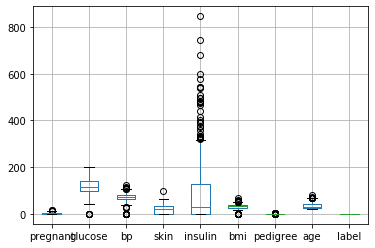

In [11]:
#boxplot
pima.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23682c90>,
      dtype=object)

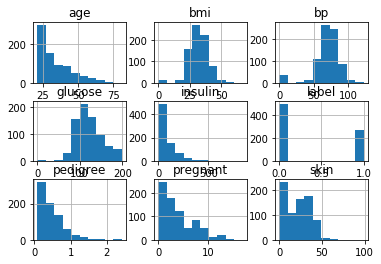

In [12]:
pima.hist()

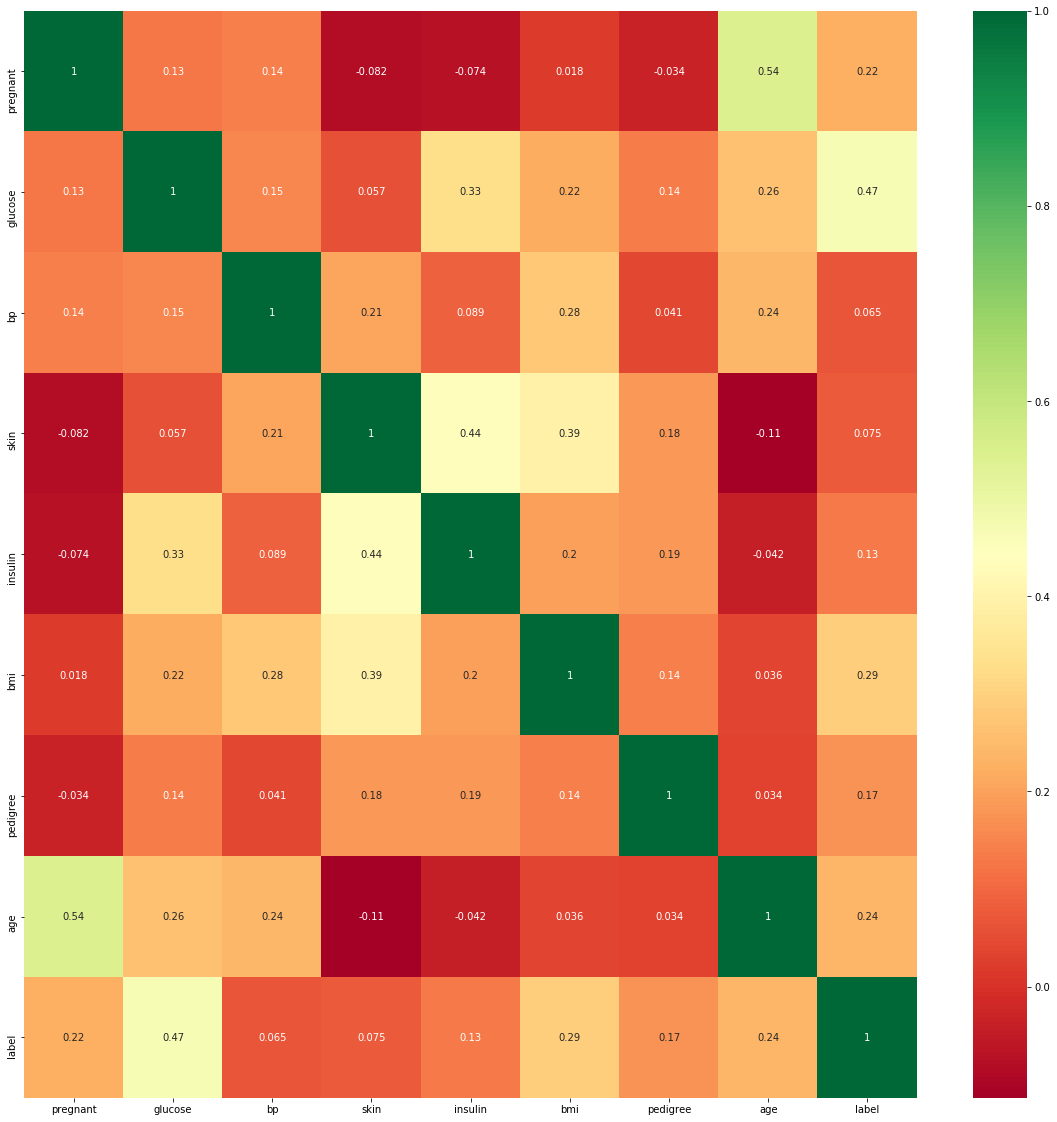

In [18]:
corrmat = pima.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(pima[top_corr_features].corr(),annot=True,cmap="RdYlGn")

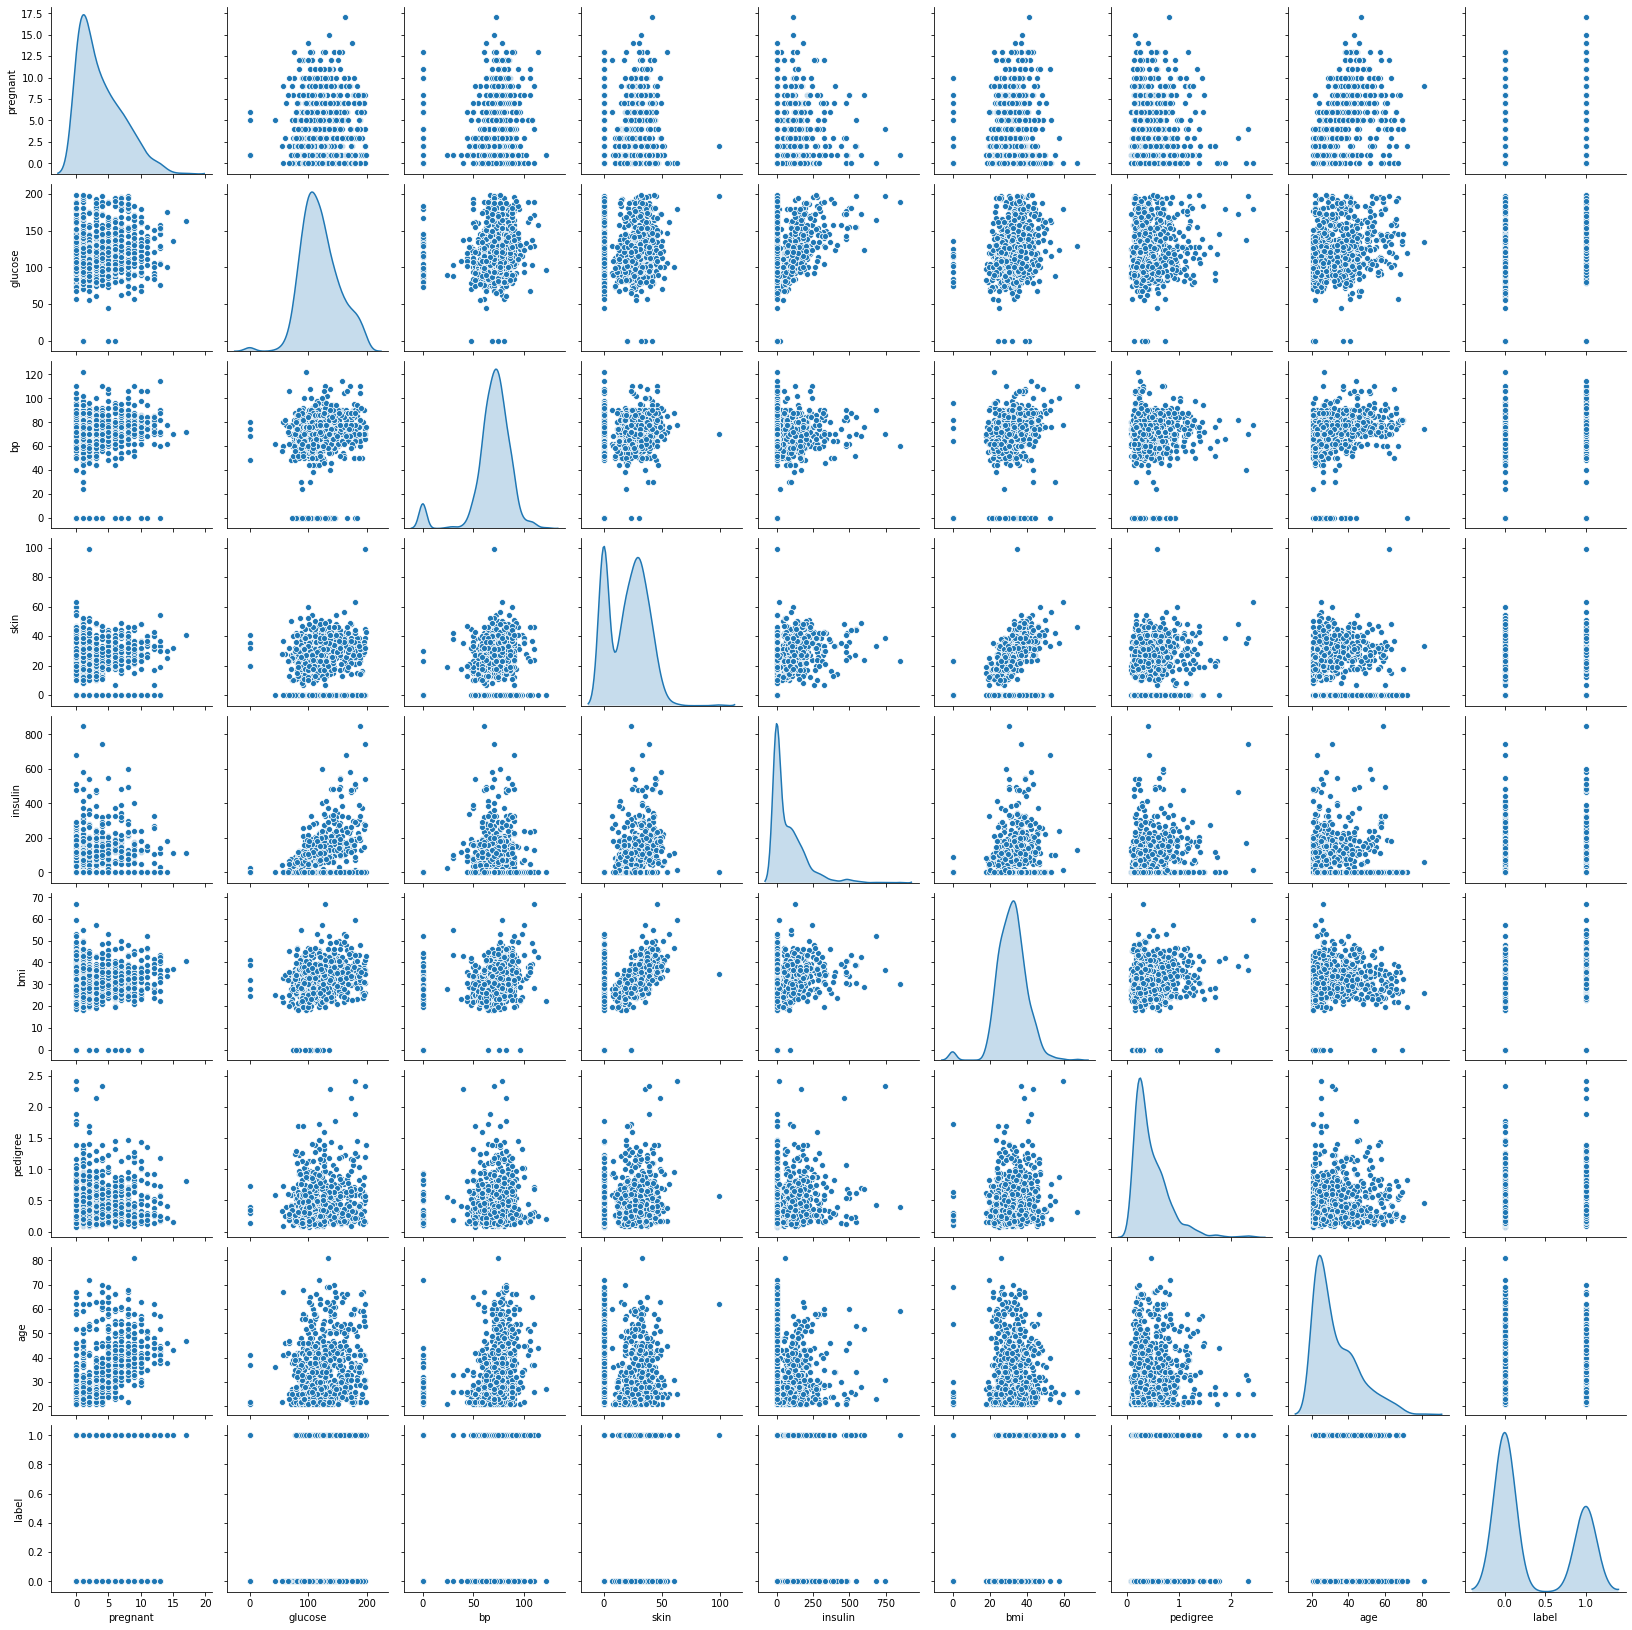

In [19]:
sns.pairplot(pima, diag_kind = 'kde')

Split dataset in features and target variable

In [20]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
print(X)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns]


In [21]:
y = pima.label # Target variable
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


Splitting Data<br>
Import train_test_split function

In [22]:
from sklearn.model_selection import train_test_split
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: label, Length: 537, dtype: int64

In [23]:
X_test
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: label, Length: 231, dtype: int64

uilding Decision Tree Model<br>
Import Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

Train Decision Tree Classifer

In [25]:
clf = clf.fit(X_train,y_train)

Predict the response for test dataset

In [26]:
y_pred = clf.predict(X_test)

valuating Model<br>
mport scikit-learn metrics module for accuracy calculation<br>
rom sklearn import metrics <br>
Model Accuracy, how often is the classifier correct?<br>
rint("Accuracy:",metrics.accuracy_score(y_test, y_pred))

rom sklearn.metrics import precision_recall_fscore_support<br>
recision_recall_fscore_support(y_test, y_pred)

rom sklearn.metrics import confusion_matrix<br>
onfusion_matrix(y_test, y_pred)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115  31]
 [ 42  43]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.58      0.51      0.54        85

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [28]:
# Print the decision tree

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('parkinson_tree.dot','w')
dot_data = tree.export_graphviz(clf, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()



isualizing Decision Trees


<br>
from sklearn.externals.six import StringIO  <br>
from IPython.display import Image  <br>
from sklearn.tree import export_graphviz<br>
import pydotplus<br>
dot_data = StringIO()<br>
export_graphviz(, out_file=dot_data,  <br>
                filled=True, rounded=True,<br>
                special_characters=True)<br>
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  <br>
Image(graph.create_png())<br>


ptimizing Decision Tree Performance<br>
Create Decision Tree classifer object

In [29]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

Train Decision Tree Classifer

In [30]:
clf1 = clf1.fit(X_train,y_train)

redict the response for test dataset

In [31]:
y_pred = clf1.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  22]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [33]:
# Print the decision tree

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('parkinson_tree1.dot','w')
dot_data = tree.export_graphviz(clf1, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()
